In [19]:
#matplotlib导包
%matplotlib inline 
import os
import json
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
mpl.rcParams['font.sans-serif'] = ['simhei'] #指定默认字体  
#开启matplotlib图形显示
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
from datetime import datetime


In [41]:
#时间戳转化日期
import time
a =1568003089000	
time_local = time.localtime(int(a/1000))
dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
print(dt[:10])
a.weekday()

2019-09-09


AttributeError: 'int' object has no attribute 'weekday'

In [19]:
#### 获取当前时间,也就是时间戳
time_now = int(time.time())
#转换成localtime
time_local = time.localtime(time_now)
#转换成新的时间格式(2016-05-09 18:59:20)
dt_1 = time.strftime("%Y-%m-%d %H:%M:%S",time_local)

print(dt_1)

2020-01-12 15:36:25


In [ ]:
#转更小的储存方式
df = np.array(df,dtype='int32')

In [ ]:
#拿出缺失行看看长什么样子
df[df.isnull().values==True]
#在原数据上去掉缺失值
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
#按条件赋值
user_goods_df.loc[(19>user_goods_df["weight_change_target"]) & (user_goods_df["weight_change_target"]>=15),"purpose_label"] = 6

In [1]:
#取空值行
user_df[user_df['purpose_label'].isnull().values==True]

NameError: name 'user_df' is not defined

In [ ]:
#转float32节约内存
df = np.array(df,dtype='float32')

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

train = pd.read_csv("datasets/titanic_train.csv")
test = pd.read_csv("datasets/titanic_test.csv")

#数据清洗
def clean(titanic):
    titanic["age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["child"] = titanic["Age"].apply(lambda x:1 if x<15 else 0)#是否是小孩
    
    titanic["sex"] = titanic["Sex"].apply(lambda x:1 if x=="male" else 0)
    titanic["Embarked"] = titanic["Embarked"].fillna("S")
    def embark(Embark):
        if Embark == "S":
            return 1
        elif Embark == "C":
            return 2
        else:
            return 3
    titanic["embarked"] = titanic["Embarked"].apply(embark)
    titanic["family"] = titanic["SibSp"]+titanic["Parch"]+1
    titanic["cabin"] = titanic["Cabin"].apply(lambda x: 0 if x=="N" else 1)
    def getname(Name):
        if "Mrs" in str(Name):
            return 2
        elif "Mr" in str(Name):
            return 1
        else:
            return 0
    titanic["name"] = titanic["Name"].apply(getname)
    titanic["fare"] = titanic["Fare"].fillna(titanic["Fare"].median())
    return titanic
train_data = clean(train)
test_data = clean(test)

features = ["Pclass","sex","child","family","fare","embarked","cabin"]
clf = XGBClassifier(learning_rate=0.1,max_depth=2,silent=True,objective='binary:logistic')
param_test = {
    'n_estimators': [30,32,34,36,38,40,42,44,46,48,50],
    'max_depth': [2,3,4,5,6,7]
}#大杀器XGBoost
grid_search = GridSearchCV(estimator=clf , param_grid=param_test , scoring='accuracy',cv=5)
grid_search.fit(train[features],train["Survived"])
grid_search.grid_scores_,grid_search.best_params_,grid_search.best_score_
predict_data = grid_search.predict(test[features])

In [ ]:
# 对测试集进行预测
ans = model.predict(X_test)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))


In [ ]:
#删除没有索引的第一行
user_df=user_df[~user_df['user_id'].isin(['user_id'])]

In [ ]:
#将Title列（文字）中的年份用正则匹配的方式去掉，cnn
pattern = re.compile(r'^(.*)\((\d+)\)$')
title_map = {val:pattern.match(val).group(1) for ii,val in enumerate(set(movies['Title']))}
movies['Title'] = movies['Title'].map(title_map)

In [3]:
import pandas as pd
df = pd.DataFrame([  
            ['green' , 'A'],   
            ['red'   , 'B'],   
            ['blue'  , 'A']])  
df.columns = ['color',  'class'] 
df

,color,class
0,green,A
1,red,B
2,blue,A


In [4]:
df.loc[df['color']=='red']['color']= 1

/Users/wjj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df.rename(columns={'color':1})

,1,class
0,green,A
1,red,B
2,blue,A


In [6]:
df

,color,class
0,green,A
1,red,B
2,blue,A


In [ ]:
#找到dataframe中某列最大值的索引
goods_class['class_7'].idxmax()

In [ ]:
#减少df的内存使用
def reduce_mem_usage(df, verbose=True):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [6]:
from sklearn.datasets import make_classification
#造一些数据，X是向量，y是标签
X, y = make_classification(n_samples=5000, n_features=10, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.61, 0.35, 0.04],
                           class_sep=0.8, random_state=0)


In [7]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#以label，平衡样本
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)
sorted(Counter(y_resampled).items())

In [ ]:
#dataframe groupby second_id的多行转成多列
add_not_buy_df = add_not_buy_df.set_index(['second_id',add_not_buy_df.groupby(['second_id']).cumcount()+1]).unstack().sort_index(level=1, axis=1)
add_not_buy_df.columns = add_not_buy_df.columns.map('{0[0]}_{0[1]}'.format)
add_not_buy_df.reset_index()
add_not_buy_df

In [ ]:
#训练集分成K-Fold，用其他K-1 Fold计算CTR，然后merge给第K个Fold，遍历K次。然后训练集整体计算CTR，再merge给测试集。
def ctr_fea(train,test,feature):
    for fea in feature:
        print(fea)
        temp = train[['label',fea]].groupby(fea)['label'].agg({fea+'_sum':sum,
                                                          fea+'_count':'count'}).reset_index()
        temp[fea+'_ctr'] = temp[fea+'_sum']/(temp[fea+'_count']+10)
        test = test.merge(temp[[fea,fea+'_ctr']],on=fea,how='left')
    for i in range(len(feature)-1):
        for j in range(i+1,len(feature)):
            col = [feature[i],feature[j]]
            print(col)
            temp = train[['label',feature[i],feature[j]]].groupby(col)['label'].agg({'_'.join(col)+'_sum':sum,
                                                                                    '_'.join(col)+'_count':'count'}).reset_index()
            temp['_'.join(col)+'_ctr'] = temp['_'.join(col)+'_sum']/(temp['_'.join(col)+'_count']+10)
            test = test.merge(temp[col+['_'.join(col)+'_ctr']],on=col,how='left')
    return test

train['label'] = label
train_new = None
skf = StratifiedKFold(n_splits=5,random_state=2019,shuffle=True)
for i,(train_index,valid_index) in enumerate(skf.split(train,label)):
    print('flod_{}'.format(i+1))
    temp = ctr_fea(train.iloc[train_index],train.iloc[valid_index],feature)
    train_new = pd.concat([train_new,temp])
test_new = ctr_fea(train,test,feature)


# 数据清洗

In [ ]:
#在index_3前提下，取出（index_0或index_1）成立，以及index_2成立的
index_0 = df['feature_name_0'] != 0
index_1 = df['feature_name_1'] != 0
index_2 = (df['feature_name_2'] > 0) & (df['feature_name_3'] != 0)
idnex_3 = df['feature_name_4'] < 100
df_result = df[(index_0 | index_1) & index_2 & ~index_3]

# 特征工程

In [ ]:
#加速特征工程计算速度
#手工开多进程
from pandarallel import pandarallel
pandarallel.initialize()
df.parallel_apply(func, axis=1)
#自动开多进程
import modin.pandas as mpd
df=mpd.DataFrame(data)
df.apply(func, axis=1)
#dask也可以试试

In [ ]:
df['feature_name_nunique'] = df.groupby('feature_name').feature_name_2.transform('nunique')

In [ ]:
#https://github.com/fanfanda/OGeek-Competition/blob/master/base_feature.py
since = time.time()
# 算一些全局统计量
# ---- click 特征 ----
list_click_feature = ['prefix', 'title', 'tag', 'max_query_prediction_keys']

# 计算某特征单次点击
for feature in list_click_feature:
    printlog('计算' + feature + '点击次数', is_print_output)
    not_zip_all_data[feature + '_click'] = not_zip_all_data.groupby(feature)[feature].transform('count')
# 部分二元交叉点击
not_zip_all_data['prefix_title_click'] = not_zip_all_data.groupby(['prefix', 'title']).prefix.transform('count')
not_zip_all_data['prefix_tag_click'] = not_zip_all_data.groupby(['prefix', 'tag']).prefix.transform('count')
not_zip_all_data['title_tag_click'] = not_zip_all_data.groupby(['title', 'tag']).title.transform('count')
not_zip_all_data['title_max_query_prediction_keys_click'] = not_zip_all_data.groupby(['title', 'max_query_prediction_keys']).title.transform('count')
not_zip_all_data['tag_max_query_prediction_keys_click'] = not_zip_all_data.groupby(['tag', 'max_query_prediction_keys']).tag.transform('count')
# 部分三元交叉点击
not_zip_all_data['prefix_title_tag_click'] = not_zip_all_data.groupby(['prefix', 'title', 'tag']).prefix.transform('count')

time_elapsed = time.time() - since
print('complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60)) # 打印出来时间

In [ ]:
encoder = preprocessing.LabelEncoder()
not_zip_all_data['tag'] = encoder.fit_transform(not_zip_all_data.tag)

In [ ]:
#数据随机取样比例
frac_size = 0.5
# 转换率折数
sec_size = 5
is_fill_na = False
# 初始化一次随机划分
random.seed(19930326)
#把数据随机打上折数标签
all_data['random_sector'] = [random.randint(1, sec_size) for num in range(len(all_data))]
#-1样本不参与打折
all_data.loc[all_data.label == -1, 'random_sector'] = 0
#需要转化率防止过拟合的特征
convert_feature = ['prefix', 'title', 'tag', 'max_query_prediction_keys', 'prefix_pinyin', 'prefix_fix']
#开始时间
since = time.time()

for index, feature in enumerate(convert_feature):
    for sec in range(sec_size + 1):
        #正样本K折取样
        temp = all_data[(all_data.label != -1)&(all_data.random_sector != sec)][[feature, 'label']]
        #正样本随机取样
        if sec != 0:
            temp = temp.sample(frac = frac_size, random_state = 19930326).reset_index(drop = True)
        #平滑处理
        temp[feature + '_all_count'] = temp.groupby(feature).label.transform('count')
        temp[feature + '_label_count'] = temp.groupby(feature).label.transform('sum')
        HP = HyperParam(1, 1)
        HP.update_from_data_by_moment(temp[feature + '_all_count'].values, temp[feature + '_label_count'].values)
        temp[feature + '_convert'] = (temp[feature + '_label_count'] + HP.alpha) / (temp[feature + '_all_count'] + HP.alpha + HP.beta)
        temp = temp[[feature, feature + '_convert']].drop_duplicates()
        #深拷贝
        sec_data = copy.deepcopy(all_data[all_data.random_sector == sec])
        sec_data = pd.merge(sec_data, temp, on = [feature], how = 'left')
        if is_fill_na:
            sec_data[feature + '_convert'].fillna(HP.alpha / (HP.alpha + HP.beta), inplace = True)
        if sec:
            new_all_data = pd.concat((new_all_data, sec_data))
        else:
            new_all_data = copy.deepcopy(sec_data)
    all_data = copy.deepcopy(new_all_data)
time_elapsed = time.time() - since
print('complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60)) # 打印出来时间

In [ ]:
# 和当初baseline所用一样
# add ctr feature
data['period'] = data['day']
data['period'][data['period'] < 27] = data['period'][data['period'] < 27] + 31
for feat_1 in ['advert_id', 'advert_industry_inner', 'advert_name', 'campaign_id', 'creative_height',
               'creative_tp_dnf', 'creative_width', 'province', 'f_channel']:
    res = pd.DataFrame()
    temp = data[[feat_1, 'period', 'click']]
    for period in range(27, 35):
        if period == 27:
            count = temp.groupby([feat_1]).apply(
                lambda x: x['click'][(x['period'] <= period).values].count()).reset_index(name=feat_1 + '_all')
            count1 = temp.groupby([feat_1]).apply(
                lambda x: x['click'][(x['period'] <= period).values].sum()).reset_index(name=feat_1 + '_1')
        else:
            count = temp.groupby([feat_1]).apply(
                lambda x: x['click'][(x['period'] < period).values].count()).reset_index(name=feat_1 + '_all')
            count1 = temp.groupby([feat_1]).apply(
                lambda x: x['click'][(x['period'] < period).values].sum()).reset_index(name=feat_1 + '_1')
        count[feat_1 + '_1'] = count1[feat_1 + '_1']
        count.fillna(value=0, inplace=True)
        count[feat_1 + '_rate'] = round(count[feat_1 + '_1'] / count[feat_1 + '_all'], 5)
        count['period'] = period
        count.drop([feat_1 + '_all', feat_1 + '_1'], axis=1, inplace=True)
        count.fillna(value=0, inplace=True)
        res = res.append(count, ignore_index=True)
    print(feat_1, ' over')
    data = pd.merge(data, res, how='left', on=[feat_1, 'period'])

In [ ]:
##时间序列特征
#你可能认为日期和时间是标准化的，因为它们是如此普遍，不过，其中仍然有一些坑。
#有些任务可能需要额外的日历特征。比如，现金提取可能与「账单日」相关联；地铁月卡的购买可能和「月初」相关联。一般而言，处理时序数据时，最好有一份包含公众节假日、异常天气情况及其他重要事件的日历。
#处理小时和分钟不像看起来那么简单。如果你将小时作为实数变量，那么 023:00:00 01.01。如果将它们编码为类别变量，那么会生成大量特征，同时丢失时间接近度的信息，即 22 和 23 之间的差异将与 22 和 7 之间的差异相同。
#所以，我们可以使用一些更加复杂的方法来处理这些数据，比如将时间投影到圆上，然后使用其 cos 和 sin 值作为两个坐标的值。
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

from scipy.spatial import distance



In [ ]:
#这一转换保留了时间点间的距离，对于需要估计距离的算法（kNN、SVM、k-均值等）使用这种方法来处理时间数据会很有帮助。下面计算经这种方法转化后 23 点和 1 点的距离。
euclidean(make_harmonic_features(23), make_harmonic_features(1))

In [ ]:
#移除方差小于0.9的特征
from sklearn.feature_selection import VarianceThreshold
df = VarianceThreshold(.9).fit_transform(x_data_generated)

# A/B Test效果作图

In [100]:
relative_data_list = [13.4,-0.72,12.1,14.8,14,-0.5,2.4,16.7,18.6,12.4,15.4,9.8,-4,6.6,2.1,16.6,4.9]
day_list = ['11月27日','11月28日','11月29日','12月27日','12月28日','12月29日','12月30日','12月31日','1月1日','1月2日','1月8日',
           '1月9日','1月10日','1月11日','1月12日','1月13日','1月14日'
           ]
absolute_data_list = [38056,-2689,11745,31391,25724,-1043,4821,35481,34118,21789,34381,21419,-8807,11722,4634,29210,7342]
absolute_data_list_2 = [38056,-2689,11745,31391,25724,-1043,4821,35481,34118,21789]

No handles with labels found to put in legend.
/Users/wjj/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


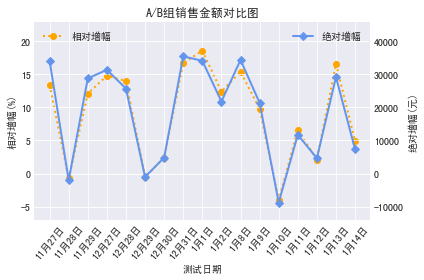

In [97]:
plt.style.use("seaborn-darkgrid")
from pylab import *
import pylab as pl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
fig = plt.figure()
plt.title("A/B组销售金额对比图")
plt.legend(loc='upper left')
ax1 = fig.add_subplot(111)
line1 = ax1.plot(day_list,relative_data_list,color="orange",linewidth=2,linestyle=':',label='相对增幅', marker='o')
ax1.set_ylabel('相对增幅(%)')
ax1.set_xlabel('测试日期')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax1.set_ylim(-7, 23)
ax2 = ax1.twinx()
ax2.set_ylim(-14000, 46000)
line2=ax2.plot(day_list,absolute_data_list,color="cornflowerblue",linewidth=2,linestyle='-',label='绝对增幅', marker='D')
ax2.set_xlabel('测试日期')
ax2.set_ylabel('绝对增幅(元)')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)
for xtick in ax1.get_xticklabels():
    xtick.set_rotation(50) 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('/Users/wjj/Desktop/test2.jpg',dpi=800)
plt.show()

## 将user数据集list列转化为多列

In [47]:
data_df = pd.read_csv(filepath_or_buffer = '/Volumes/茅草屋/1227/recommendation_result_1.csv',sep=",", header=None)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
del data_df[0]
data_df = data_df[~(data_df[1] == 'second_id')]
data_df = data_df.rename(columns={1:'second_id',2:'goods'})

In [51]:

data_df_1 =  pd.concat([data_df, data_df['goods'].str.split('\'', expand=True)], axis=1,names='new_names_')

In [52]:
data_df_1 = data_df_1[['second_id',1]]
data_df_1 = data_df_1.rename(columns={1:'goods'})

In [53]:
data_df_2 =  pd.concat([data_df_1, data_df_1['goods'].str.split(',', expand=True)], axis=1,names='new_names_')

In [54]:
data_df_2 = data_df_2[['second_id',0,1,2]]
data_df_2.to_csv('/Volumes/茅草屋/0108/recommendation_result_1.csv')